## 11.1.1 標準的な分布


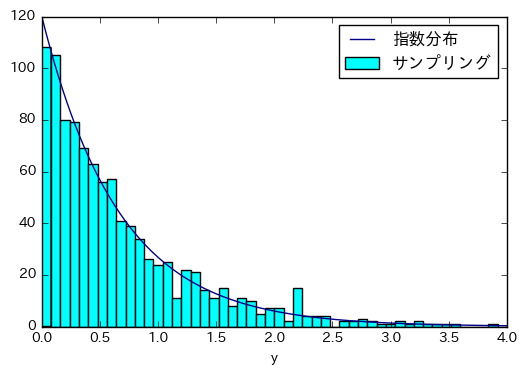

In [61]:
z = np.random.uniform(0, 1, 1000)

# 指数分布のλ
lam = 1.5

# 指数分布の式
exp_dist = lambda x: lam * np.exp(-lam * x) 

y = -np.log(1 - z) / lam

# yのヒストグラム
plt.hist(y, bins=50, range=(0, 4), color='aqua', label='サンプリング')

# 指数分布のグラフ
x = np.linspace(0, 4, 1000)
plt.plot(x, exp_dist(x)*80, 'darkblue', label='指数分布')

plt.xlabel('y')
plt.legend(loc='best', prop={'size': 12})

### コーシー分布


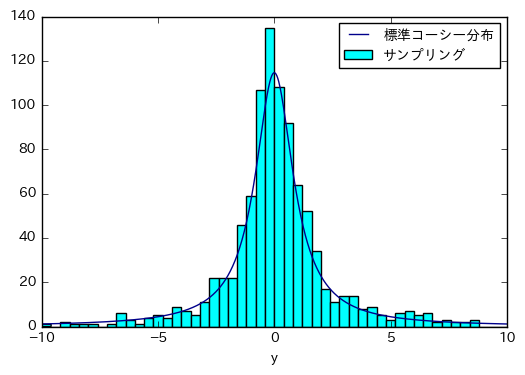

In [59]:
# 標準コーシー分布の式
cauchy_dist = lambda x: 1 / (np.pi * (1 + x**2)) 

z = np.random.uniform(0, 1, 1000)
y = np.tan(np.pi * (z - 0.25))

# yのヒストグラム
plt.hist(y, bins=50, range=(-10, 10), color='aqua', label='サンプリング')


# 標準コーシー分布のグラフ
x = np.linspace(-10, 10, 1000)
plt.plot(x, cauchy_dist(x)*360, 'darkblue', label='標準コーシー分布')

plt.xlabel('y')
plt.legend(loc='best', prop={'size': 10})

### Box-Muller法


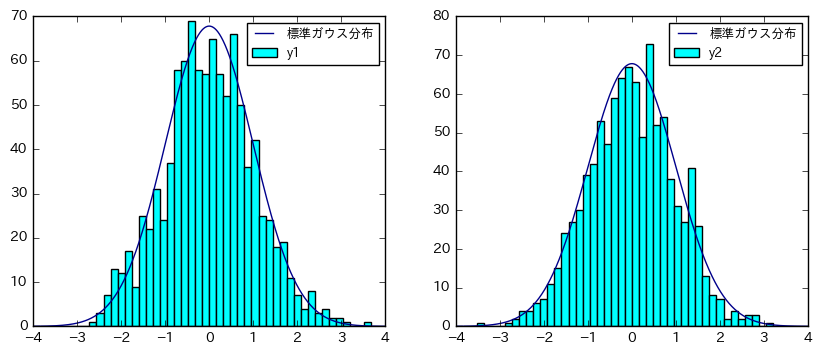

In [44]:
gauss_pdf = lambda x: np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

z = np.random.uniform(0, 1, (1000, 2))
# 変換
y1 = np.sqrt(-2 * np.log(z[:,0])) * np.cos(2 * np.pi * z[:,1])
y2 = np.sqrt(-2 * np.log(z[:,0])) * np.sin(2 * np.pi * z[:,1])


fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4), sharex=True)

# y1のヒストグラム
axL.hist(y1, bins=50, range=(-4, 4), color='aqua', label='y1')
# y2のヒストグラム
axR.hist(y2, bins=50, range=(-4, 4), color='aqua', label='y2')


# 標準ガウス分布のグラフ
x = np.linspace(-4, 4, 1000)
axL.plot(x, gauss_pdf(x)*170, 'darkblue', label='標準ガウス分布')
axR.plot(x, gauss_pdf(x)*170, 'darkblue', label='標準ガウス分布')

axL.legend(loc='best', prop={'size': 9})
axR.legend(loc='best', prop={'size': 9})

## 11.1.2 棄却サンプリング

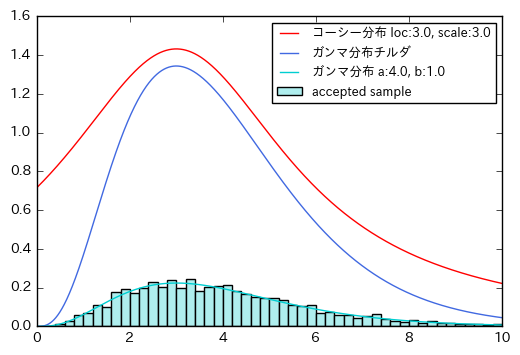

In [258]:
from scipy.stats import *
from scipy.special import *

# ガンマ分布のパラメータ
a = 4.0
b = 1.0

# ガンマ分布
gamma_pdf = lambda z: (b**a * z**(a-1) * np.exp(-b*z)) / (gamma(a))

# ガンマ分布チルダ（ガンマ分布の正規化項無いバージョン）
gamma_tilde_pdf = lambda z: z**(a - 1) * np.exp(-b*z)

# コーシー分布のパラメータ
loc = 3.0
scale = 3.0
k = 13.5

N = 10000
# コーシー分布からサンプリング
z = cauchy.rvs(loc=loc, scale=scale, size=N)

# 区間[0, kq(z)]の一様分布からuをサンプリング
u = np.array([np.random.uniform(0, k * cauchy.pdf(zi, loc=loc, scale=scale)) for zi in z])

# u > ~p(zi)となるサンプルを調べる
reject_indexs = np.where(u - gamma_tilde_pdf(z) > 0)[0]
# 条件を満たしたものは棄却されるので、削除
z_accepted = np.delete(z, reject_indexs)

# acceptされたサンプルのヒストグラム描画
plt.hist(z_accepted, bins=50, range=(0, 10), color='paleturquoise', label='accepted sample', normed=1)

# 各分布の描画
x = np.linspace(0, 10, 10000)
plt.plot(x, cauchy.pdf(x, loc=loc, scale=scale)*k, c='r', label='コーシー分布 loc:{}, scale:{:}'.format(loc, scale))
plt.plot(x, gamma_tilde_pdf(x), c='royalblue', label='ガンマ分布チルダ')
plt.plot(x, gamma_pdf(x), 'darkturquoise', label='ガンマ分布 a:{}, b:{}'.format(a, b))

plt.legend(loc='best', prop={'size': 9})


(0, 10)

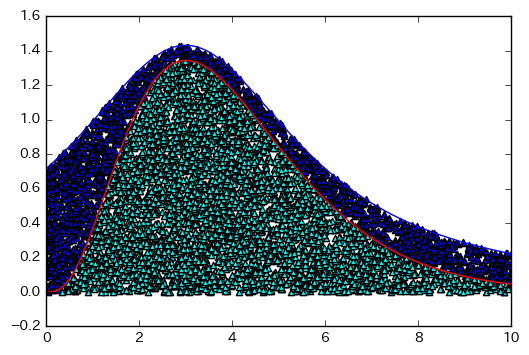

In [231]:
plt.scatter(z_rejected, u[indexs], marker='^', c='blue')
plt.scatter(z_accepted, np.delete(u, indexs), marker = '^', c='aqua')
x = np.linspace(0, 10, 1000)
plt.plot(x, cauchy.pdf(x, loc=loc, scale=scale)*k)
plt.plot(x, gamma_pdf(x)*6, c='r')
plt.xlim(0, 10)

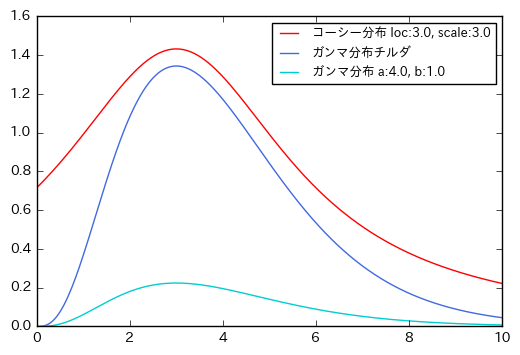

In [253]:
x = np.linspace(0, 10, 10000)
plt.plot(x, cauchy.pdf(x, loc=loc, scale=scale)*k, c='r', label='コーシー分布 loc:{}, scale:{:}'.format(loc, scale))
plt.plot(x, gamma_tilde_pdf(x), c='royalblue', label='ガンマ分布チルダ')
plt.plot(x, gamma_pdf(x), 'darkturquoise', label='ガンマ分布 a:{}, b:{}'.format(a, b))
plt.legend(loc='best', prop={'size': 9})

### 11.1.3　適応的棄却サンプリング


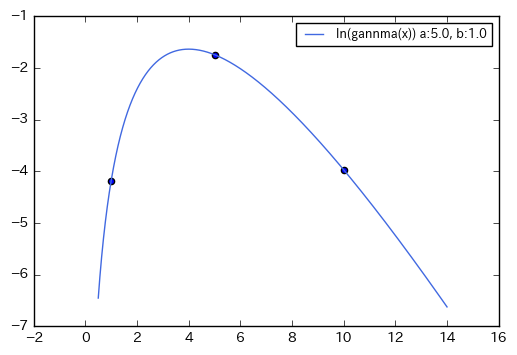

In [29]:
from scipy.stats import *
from scipy.special import *

# ガンマ分布のパラメータ
a = 5.0
b = 1.0

# ガンマ分布
gamma_pdf = lambda z: (b**a * z**(a-1) * np.exp(-b*z)) / (gamma(a))

# ガンマ分布のログ
def h(x):
    C = np.log(b**a / gamma(a))
    return C + (a - 1.0) * np.log(x) - b * x

x = np.linspace(0.5, 14, 10000)
plt.plot(x, h(x), 'royalblue', label='ln(gannma(x)) a:{}, b:{}'.format(a, b))

subs = np.array([1.0, 5.0, 10.0])
plt.scatter(subs, h(subs), marker='o')
plt.legend(loc='best', prop={'size': 9})

### 11.1.5　重点サンプリング


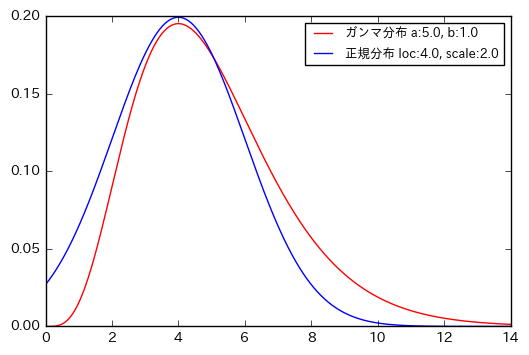

In [153]:
from scipy.stats import *

# ガンマ分布のパラメータ
a = 5.0
b = 1.0

# ガンマ分布
gamma_pdf = lambda z: (b**a * z**(a-1) * np.exp(-b*z)) / (gamma(a))
 

# ガウス分布のパラメータ
loc = 4.0
scale = 2.0

x = np.linspace(0, 14, 10000)
plt.plot(x, gamma.pdf(x, a=a), 'r', label='ガンマ分布 a:{}, b:{}'.format(a, b))
plt.plot(x, norm.pdf(x, loc=loc, scale=scale), c='b', label='正規分布 loc:{}, scale:{:}'.format(loc, scale))
plt.legend(loc='best', prop={'size': 9})

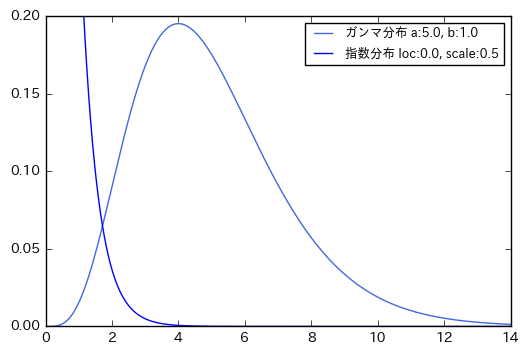

In [81]:
x = np.linspace(0, 14, 10000)
plt.plot(x, gamma.pdf(x, a=a), 'royalblue', label='ガンマ分布 a:{}, b:{}'.format(a, b))
plt.plot(x, expon.pdf(x, loc=0.0, scale=0.5), c='b', label='指数分布 loc:{}, scale:{}'.format(0.0, 0.5))
plt.ylim(0.0, 0.2)
plt.legend(loc='best', prop={'size': 9})


31.1125242658


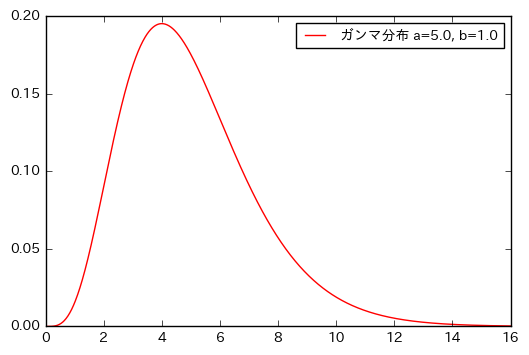

In [112]:
def f(x):
    return x**2


# サンプルサイズ
N = 1000

# ガンマ分布からサンプリング
xs = gamma.rvs(a=a, size=N, random_state=42)

z = np.linspace(0, 16, 1000)
plt.plot(z, gamma.pdf(z, a=a), c='r', label='ガンマ分布 a={}, b={}'.format(a, 1.0))
plt.legend(loc='best', prop={'size': 10})

# ガンマ分布からのサンプリング結果のモンテカルロ積分
ev = f(xs).sum() / N
print(ev)

ev:  31.1125242658
ev_importance:  6.00875678379e+12


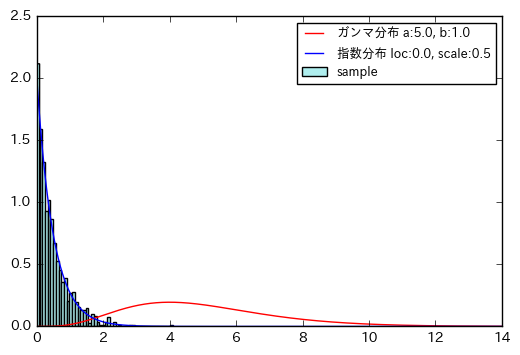

In [164]:
from scipy.stats import *

# ガンマ分布のパラメータ
gamma_a = 5.0
gamma_b = 1.0

# 指数分布のパラメータ
expon_loc = 0.0
expon_scale = 0.5



def f(x):
    return x**2


def p(x):
    return gamma.pdf(x, a=gamma_a)


def q(x):
    return expon.pdf(z, loc=expon_loc, scale=expon_scale)


# サンプルサイズ
N = 1000

# ガンマ分布からサンプリング
gamma_samples = gamma.rvs(a=a, size=N, random_state=42)
# ガンマ分布からサンプリングしたサンプルを用いたモンテカルロ積分
ev = f(gamma_samples).sum() / N
print('ev: ', ev)

# 提案分布p(x)（指数分布）からサンプリング
xs = expon.rvs(loc=expon_loc, scale=expon_scale, size=N, random_state=42)
# 重点サンプリングによるモンテカルロ積分
ev_importance = np.sum([f(x) * p(x) / q(x) for x in xs]) / N
print('ev_importance: ', ev_importance)


# 指数分布とガンマ分布の描画
plt.hist(xs, bins=50, color='paleturquoise', label='sample', normed=1)
z = np.linspace(0, 14, 10000)
plt.plot(z, gamma.pdf(z, a=gamma_a), c='r',
         label='ガンマ分布 a:{}, b:{}'.format(gamma_a, gamma_b))
plt.plot(z, expon.pdf(z, loc=expon_loc, scale=expon_scale), c='b',
         label='指数分布 loc:{}, scale:{}'.format(expon_loc, expon_scale))
plt.legend(loc='best', prop={'size': 9})

ev:  31.1125242658
ev_importance:  34.3431698039


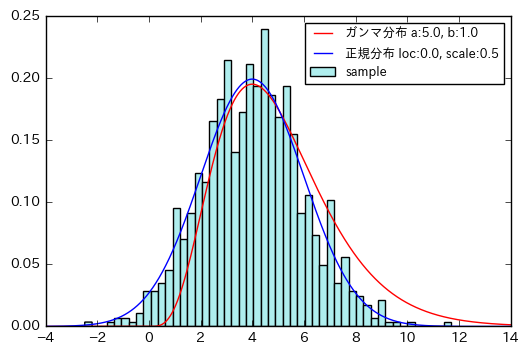

In [166]:
from scipy.stats import *

# ガンマ分布のパラメータ
gamma_a = 5.0
gamma_b = 1.0

# 正規分布（ガウス分布）のパラメータ
norm_loc = 4.0
norm_scale = 2.0



def f(x):
    return x**2


def p(x):
    return gamma.pdf(x, a=gamma_a)


def q(x):
    return norm.pdf(x, loc=norm_loc, scale=norm_scale)


# サンプルサイズ
N = 1000

# ガンマ分布からサンプリング
gamma_samples = gamma.rvs(a=a, size=N, random_state=42)
# ガンマ分布からサンプリングしたサンプルを用いたモンテカルロ積分
ev = f(gamma_samples).sum() / N
print('ev: ', ev)

# 提案分布p(x)（正規分布）からサンプリング
xs = norm.rvs(loc=norm_loc, scale=norm_scale, size=N, random_state=42)
# 重点サンプリングによるモンテカルロ積分
ev_importance = np.sum([f(x) * p(x) / q(x) for x in xs]) / N
print('ev_importance: ', ev_importance)


# 指数分布とガンマ分布の描画
plt.hist(xs, bins=50, color='paleturquoise', label='sample', normed=1)
z = np.linspace(-4, 14, 10000)
plt.plot(z, gamma.pdf(z, a=gamma_a), c='r',
         label='ガンマ分布 a:{}, b:{}'.format(gamma_a, gamma_b))
plt.plot(z, norm.pdf(z, loc=norm_loc, scale=norm_scale), c='b',
         label='正規分布 loc:{}, scale:{}'.format(expon_loc, expon_scale))
plt.legend(loc='best', prop={'size': 9})


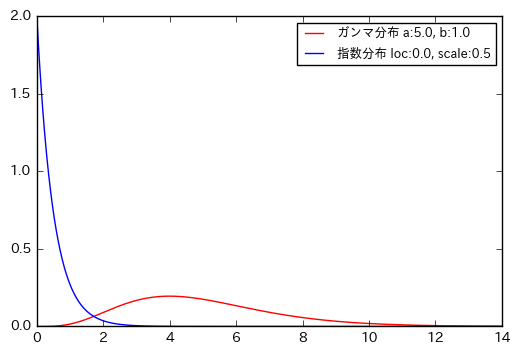

In [160]:
z = np.linspace(0, 14, 10000)
plt.plot(z, gamma.pdf(z, a=gamma_a), c='r',
         label='ガンマ分布 a:{}, b:{}'.format(gamma_a, gamma_b))
plt.plot(z, expon.pdf(z, loc=expon_loc, scale=expon_scale), c='b',
         label='指数分布 loc:{}, scale:{}'.format(expon_loc, expon_scale))
plt.legend(loc='best', prop={'size': 9})

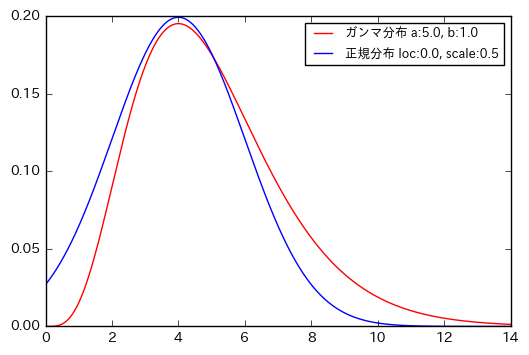

In [161]:
plt.plot(z, gamma.pdf(z, a=gamma_a), c='r',
         label='ガンマ分布 a:{}, b:{}'.format(gamma_a, gamma_b))
plt.plot(z, norm.pdf(z, loc=norm_loc, scale=norm_scale), c='b',
         label='正規分布 loc:{}, scale:{}'.format(expon_loc, expon_scale))
plt.legend(loc='best', prop={'size': 9})

### 11.1.5 SIR


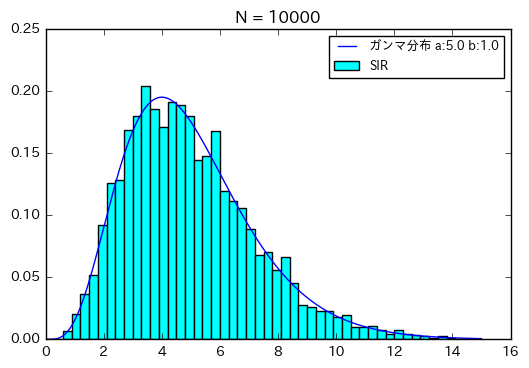

In [9]:
from scipy.stats import *

# ガンマ分布のパラメータ
gamma_a = 5.0
gamma_b = 1.0

# 一様分布のパラメータ
uniform_loc = 0
uniform_scale = 15

# サンプルサイズ
N = 100000



def p(x):
    return gamma.pdf(x, a=gamma_a, scale=gamma_b)
    
def q(x):
    return uniform.pdf(x, loc=uniform_loc, scale=uniform_scale)
    
def sampling_q():
    return uniform.rvs(loc=uniform_loc, scale=uniform_scale, size=N)

def sampling_weighted(xs, weights):
    return np.random.choice(xs, size=N, p=weights)


# 分布q(x)からサンプリング
xs = sampling_q()

# 重みを計算
rates = np.array([p(x) / q(x) for x in xs])
rate_sum = rates.sum()
weights = rates / rate_sum

# 離散確率分布から重み付けされた確率に従ってサンプリング
re_xs = sampling_weighted(xs, weights)


# サンプリング結果のプロット
plt.hist(re_xs, bins=50, range=(uniform_loc, uniform_scale),
        color='aqua',label='SIR', normed=1)

# 確率分布p(x)の描画
z = np.linspace(uniform_loc, uniform_scale, N)
plt.plot(z, p(z), color='blue',
         label='ガンマ分布 a:{} b:{}'.format(gamma_a, gamma_b))

plt.title('N = {}'.format(N))
plt.legend(loc='best', prop={'size': 9})


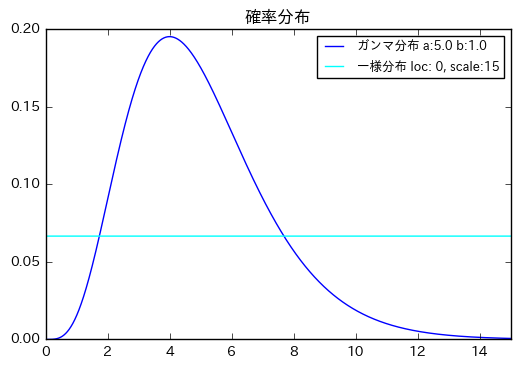

In [11]:
plt.plot(z, p(z), color='blue',
         label='ガンマ分布 a:{} b:{}'.format(gamma_a, gamma_b))
plt.plot(z, q(z), color='aqua',
         label='一様分布 loc: {}, scale:{}'.format(uniform_loc, uniform_scale))

plt.title('確率分布')
plt.xlim(uniform_loc, uniform_scale)
plt.legend(loc='best', prop={'size': 9})

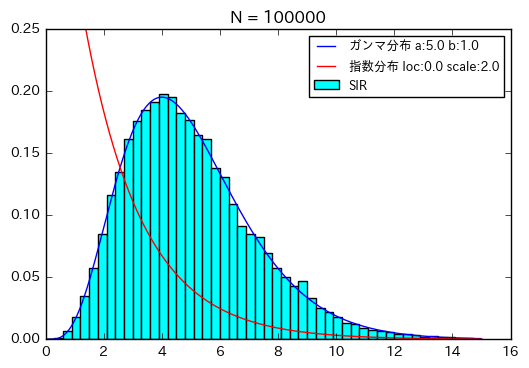

In [44]:
from scipy.stats import *

# ガンマ分布のパラメータ
gamma_a = 5.0
gamma_b = 1.0

#　指数分布のパラメータ
expon_loc = 0.0
expon_scale = 2.0

# プロット範囲
low = 0
high = 15

# サンプルサイズ
N = 100000



def p(x):
    return gamma.pdf(x, a=gamma_a, scale=gamma_b)
    
def q(x):
    return expon.pdf(x, loc=expon_loc, scale=expon_scale)
    
def sampling_q():
    return expon.rvs(loc=expon_loc, scale=expon_scale, size=N)

def sampling_weighted(xs, weights):
    return np.random.choice(xs, size=N, p=weights)


# 分布q(x)からサンプリング
xs = sampling_q()

# 重みを計算
rates = np.array([p(x) / q(x) for x in xs])
rate_sum = rates.sum()
weights = rates / rate_sum

# 離散確率分布から重み付けされた確率に従ってサンプリング
re_xs = sampling_weighted(xs, weights)


# サンプリング結果のプロット
plt.hist(re_xs, bins=50, range=(low, high),
        color='aqua',label='SIR', normed=1)

# 確率分布p(x)の描画
z = np.linspace(low, high, N)
plt.plot(z, p(z), color='blue',
         label='ガンマ分布 a:{} b:{}'.format(gamma_a, gamma_b))
plt.plot(z, q(z), color='r',
         label='指数分布 loc:{} scale:{}'.format(expon_loc, expon_scale))

plt.title('N = {}'.format(N))
plt.ylim(0, 0.25)
plt.legend(loc='best', prop={'size': 9})



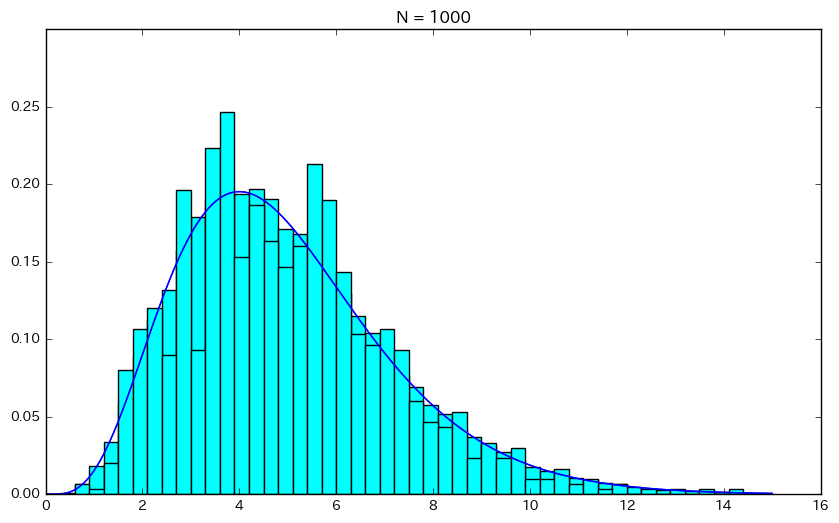

In [28]:
import matplotlib.animation as anm
from scipy.stats import *

# ガンマ分布のパラメータ
gamma_a = 5.0
gamma_b = 1.0

# 一様分布のパラメータ
uniform_loc = 0
uniform_scale = 15

# サンプルサイズ
Ns = [1000, 10000, 100000]



def p(x):
    return gamma.pdf(x, a=gamma_a, scale=gamma_b)
    
def q(x):
    return uniform.pdf(x, loc=uniform_loc, scale=uniform_scale)
    
def sampling_q(N):
    return uniform.rvs(loc=uniform_loc, scale=uniform_scale, size=N)

def sampling_weighted(xs, N, weights):
    return np.random.choice(xs, size=N, p=weights)


def SIR(N):
    # 分布q(x)からサンプリング
    xs = sampling_q(N)

    # 重みを計算
    rates = np.array([p(x) / q(x) for x in xs])
    rate_sum = rates.sum()
    weights = rates / rate_sum

    # 離散確率分布から重み付けされた確率に従ってサンプリング
    re_xs = sampling_weighted(xs, N, weights)
    
    return re_xs



fig = plt.figure(figsize = (10, 6))
x = np.arange(0, 10, 0.1)

def update(i):
    if i != 0:
        plt.cla()                      # 現在描写されているグラフを消
    
    # SIRアルゴリズム実行
    re_xs = SIR(Ns[i])
    
    # サンプリング結果のプロット
    plt.hist(re_xs, bins=50, range=(uniform_loc, uniform_scale),
        color='aqua',label='SIR', normed=1)
    
    # 確率分布p(x)の描画
    z = np.linspace(uniform_loc, uniform_scale, N)
    plt.plot(z, p(z), color='blue',
         label='ガンマ分布 a:{} b:{}'.format(gamma_a, gamma_b))
    plt.ylim(0.0, 0.30)
    plt.title('N = {}'.format(Ns[i]))


ani = anm.FuncAnimation(fig, update, interval = 1000, frames = len(Ns))

ani.save("SIR.gif", writer = 'imagemagick')


In [31]:
from IPython.display import HTML
HTML('<img src="SIR.gif">')

SIR.gif         cache           section11.ipynb
